1

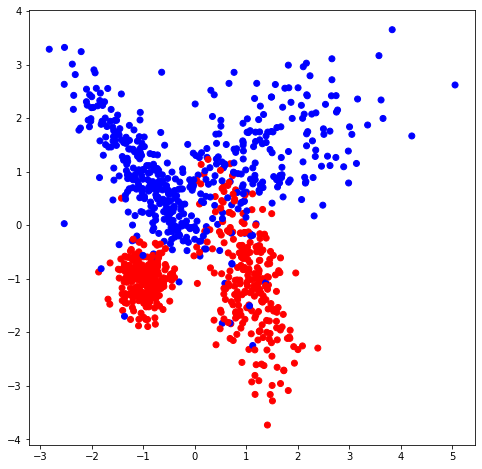

In [4]:
import numpy as np
import sklearn.datasets as datasets


classification_data, classification_labels = datasets.make_classification(n_samples=1000,n_features = 2, n_informative = 2, 
                                                      n_classes = 2, n_redundant=0, 
                                                      n_clusters_per_class=2, random_state=5)


colors = ListedColormap(['red', 'blue'])
light_colors = ListedColormap(['lightcoral', 'lightblue'])

plt.figure(figsize=(8,8))
plt.scatter(list(map(lambda x: x[0], classification_data)), list(map(lambda x: x[1], classification_data)), 
              c=classification_labels, cmap=colors)
plt.show()

In [5]:
from sklearn.tree import DecisionTreeClassifier

In [6]:
np.random.shuffle(np.arange(classification_labels.shape[0]))

In [7]:
frq = np.zeros_like(classification_labels)  
pred = np.zeros_like(classification_labels).astype(float)  
n_split = 500 
RF_=[]
for i in range(100):
    ind_ = np.arange(classification_labels.shape[0])
    np.random.shuffle(ind_)
    ind_test = ind_[:n_split].tolist()
    ind_tr = ind_[n_split:].tolist()
    x_tr,y_tr = classification_data[ind_tr,:], classification_labels[ind_tr]
    x_test,y_test = classification_data[ind_test,:], classification_labels[ind_test]
    tree_i =DecisionTreeClassifier().fit(x_tr,y_tr)
    y_pred = tree_i.predict(x_test)
    RF_.append(tree_i)
    pred[ind_test] += np.abs(y_test.astype(float) == y_pred).astype(float)
    frq[ind_test] += 1
    
error = np.mean(pred / frq)
error
    

0.8980744164470068

In [8]:
frq

array([53, 41, 52, 53, 53, 52, 51, 48, 50, 55, 50, 46, 60, 48, 52, 46, 52,
       50, 51, 55, 47, 49, 52, 49, 54, 53, 52, 55, 57, 52, 55, 49, 43, 48,
       60, 52, 48, 48, 59, 48, 46, 41, 49, 56, 50, 55, 45, 46, 52, 45, 41,
       55, 48, 48, 53, 50, 55, 50, 47, 53, 48, 45, 52, 49, 50, 51, 48, 54,
       42, 45, 44, 59, 50, 57, 59, 42, 46, 54, 50, 44, 50, 48, 43, 51, 51,
       45, 47, 48, 59, 47, 58, 59, 55, 36, 55, 51, 50, 56, 43, 46, 46, 51,
       60, 51, 51, 48, 38, 45, 41, 46, 54, 54, 55, 50, 60, 55, 56, 46, 53,
       54, 53, 48, 46, 49, 48, 62, 49, 51, 47, 50, 58, 49, 47, 56, 50, 41,
       48, 45, 55, 44, 42, 50, 46, 45, 53, 51, 51, 52, 58, 52, 51, 47, 48,
       49, 51, 53, 40, 46, 50, 59, 42, 43, 50, 46, 53, 52, 58, 52, 47, 54,
       57, 46, 53, 52, 51, 47, 48, 54, 48, 44, 49, 48, 57, 56, 46, 48, 49,
       45, 45, 52, 48, 48, 53, 52, 49, 56, 45, 56, 53, 53, 60, 49, 49, 50,
       57, 56, 49, 48, 48, 54, 51, 56, 51, 52, 51, 43, 49, 54, 50, 44, 46,
       45, 54, 57, 56, 41

In [9]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [10]:
X, y = load_iris(return_X_y=True)

X = X[:, :2]

In [11]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

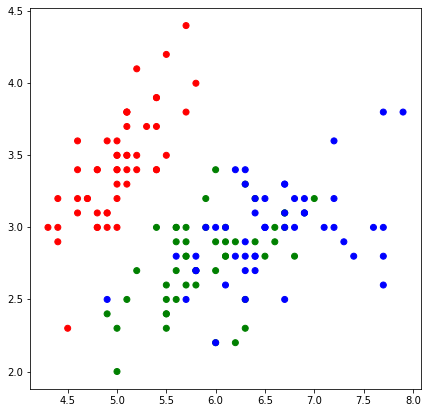

In [12]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)

In [13]:
def e_metrics(x1, x2):
    
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    
    return np.sqrt(distance)

In [14]:
def w_coeff_1(q, d):
    return q ** d 

In [15]:
def w_coeff_2(q, d):
    return 1 / (d + q)**(1 + q) 

In [16]:
def knn(x_train, y_train, x_test, k, q = 1, wv=1):
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            distance = e_metrics(x, x_train[i])
            
            weight = 1
            if wv == 1:
                weight = w_coeff_1(q, len(test_distances)+1) 
            elif wv == 2:
                weight = w_coeff_1(q, distance) 
            elif wv == 3:
                weight = w_coeff_2(q, distance)  
            elif wv == 4:
                weight = w_coeff_2(q, len(test_distances)+1)  

            test_distances.append((weight*distance, y_train[i]))  

        classes = {class_item: 0 for class_item in set(y_train)}
        
        for d in sorted(test_distances)[0:k]:
            classes[d[1]] += 1

        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

In [17]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

In [18]:
k = 3
q = 0.5

y_pred = knn(X_train, y_train, X_test, k, q, 0)

print(y_test)
print(y_pred)

print(f'Точность алгоритма при k = {k}, q = {q} : {accuracy(y_pred, y_test):.3f}')

[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 2]
[0, 1, 2, 0, 2, 2, 1, 0, 0, 1, 1, 0, 2, 2, 1, 0, 1, 1, 0, 0, 1, 1, 2, 0, 1, 1, 0, 0, 1, 1]
Точность алгоритма при k = 3, q = 0.5 : 0.733


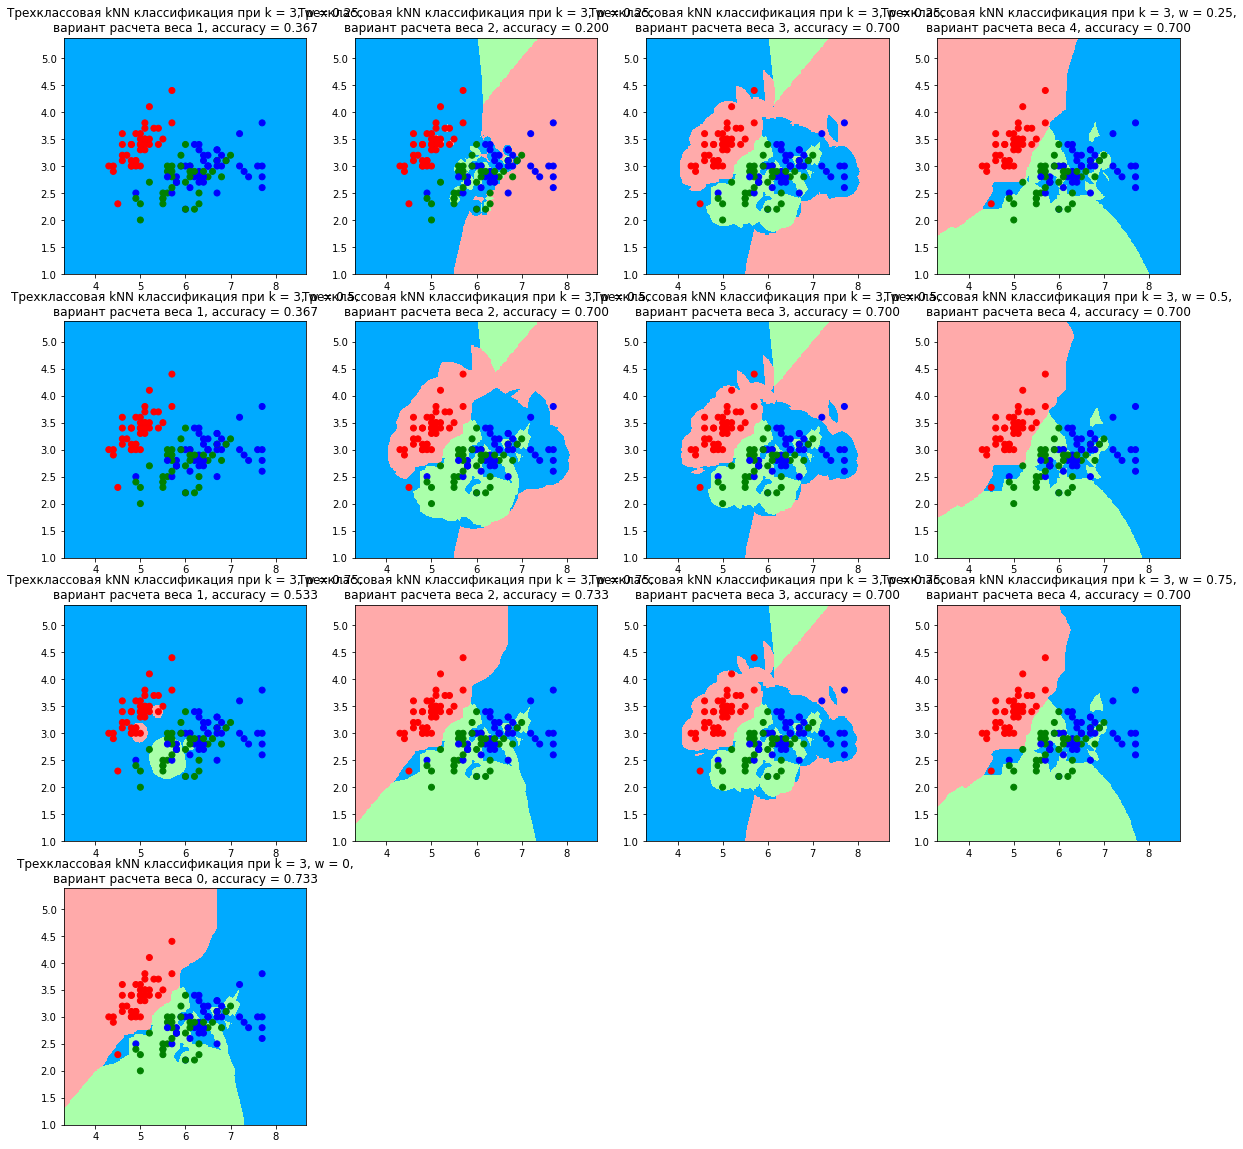

In [22]:
h = 0.02

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

plt.figure(figsize = (20, 20))

count = 0

k = 3

for q in [0.25, 0.5, 0.75]:
    for weights_version in [1, 2, 3, 4]:
    
        count += 1

        predict = knn(X_train, y_train, X_test, k, q, weights_version)
        accur = accuracy(predict, y_test)

        Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k, q, weights_version)

        Z = np.array(Z).reshape(xx.shape)

        plt.subplot(4,4,count)
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

        plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.title(f"Трехклассовая kNN классификация при k = {k}, w = {q},\nвариант расчета веса {weights_version}, accuracy = {accur:.3f}")

count += 1

predict = knn(X_train, y_train, X_test, k, 0, 0)
accur = accuracy(predict, y_test)

Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k, 0, 0)
Z = np.array(Z).reshape(xx.shape)

plt.subplot(4,4,count)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(f"Трехклассовая kNN классификация при k = {k}, w = {0},\nвариант расчета веса {0}, accuracy = {accur:.3f}")

plt.show()

2

In [23]:
from sklearn.datasets import make_blobs
import random

X, y = make_blobs(n_samples=500)

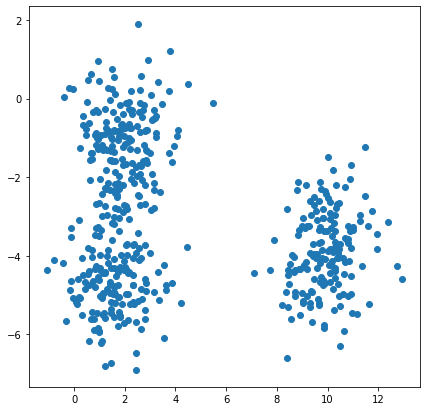

In [24]:
plt.figure(figsize=(7,7))
plt.scatter(X[:, 0], X[:, 1])

In [25]:
def kmeans(data, k, max_iterations, min_distance):   
    centroids = [data[i] for i in range(k)]
    
    for _ in range(max_iterations):
        classes = {i: [] for i in range(k)}

        for x in data:
            distances = [e_metrics(x, centroid) for centroid in centroids]
            classification = distances.index(min(distances))
            classes[classification].append(x)
        
        old_centroids = centroids.copy()
        
        for classification in classes:
            centroids[classification] = np.average(classes[classification], axis=0)
            
        optimal = True
        for centroid in range(len(centroids)):
            if np.sum(abs((centroids[centroid] - old_centroids[centroid]) / old_centroids * 100)) > min_distance:
                optimal = False
                 
        if optimal:
            break

    
    return old_centroids, classes

In [26]:
def e_metrics(x1, x2):
    
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    
    return np.sqrt(distance)

In [27]:
def kmeans_quality(centroids, clusters):
  k=0
  quality=0
  for c in centroids:
      for x in clusters[k]:
        quality += e_metrics(x, c)**2
      k+=1
  return quality

In [28]:
def visualize(centroids, classes):
    colors = ['r', 'g', 'b']
    
    plt.figure(figsize=(7,7))
    
    for centroid in centroids:
        plt.scatter(centroid[0], centroid[1], marker='x', s=130, c='black')
        
    for class_item in classes:
        for x in classes[class_item]:
            plt.scatter(x[0], x[1], color=colors[class_item])
            
    plt.show()

In [29]:
max_iterations = 10
min_distance = 1e-4
k = 3

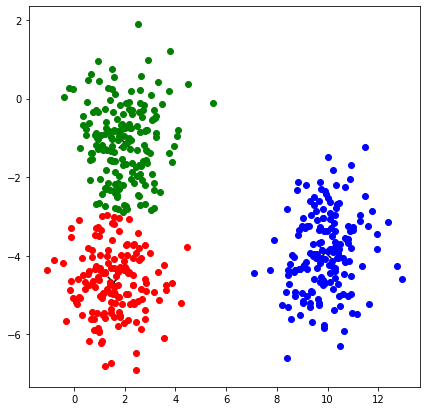

In [30]:
centroids, clusters = kmeans(X, k, max_iterations, min_distance)

visualize(centroids, clusters)

In [31]:
kmeans_q=[]
for k in range(1,11):
  centroids, clusters = kmeans(X, k, max_iterations, min_distance)
  kmeans_q.append(kmeans_quality(centroids, clusters))

In [32]:
print('среднее квадратичные внутриклассовые расстояния:\n', np.round(kmeans_q))

среднее квадратичные внутриклассовые расстояния:
 [9474. 1985.  905.  798.  670.  580.  475.  445.  391.  361.]


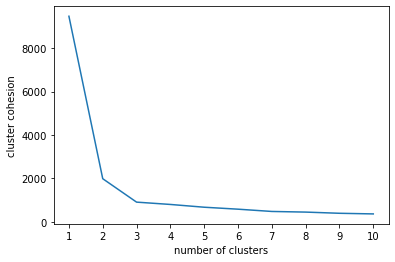

In [33]:
k=np.arange(10)
plt.xlabel('number of clusters')
plt.xticks(k+1)
plt.ylabel('cluster cohesion')
plt.plot(k+1,kmeans_q)

**Вывод:** При увеличении количества кластеров среднее квадратичное внутриклассовое расстояние постепенно уменьшается, снижается также и его изменение.